In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
from scipy.io import loadmat

In [2]:
# Load sample ECG data from the downloaded MATLAB file
mat = loadmat('ECGData.mat')

raw_data = mat['ECGData'][0][0]

df = pd.DataFrame([label[0][0] for label in raw_data[1]], columns=['Label'])
df['Data'] = [d for d in raw_data[0]]
df

In [20]:
# Grab the first ARR, CHF, and NSR ECGs in the data
ARR = df['Data'][(df['Label'] == 'ARR').argmax()]
CHF = df['Data'][(df['Label'] == 'CHF').argmax()]
NSR = df['Data'][(df['Label'] == 'NSR').argmax()]

# data_dict now contains three ECGs: ARR, CHF, NSR
data_dict = {
    'ARR': ARR,
    'CHF': CHF,
    'NSR': NSR
}

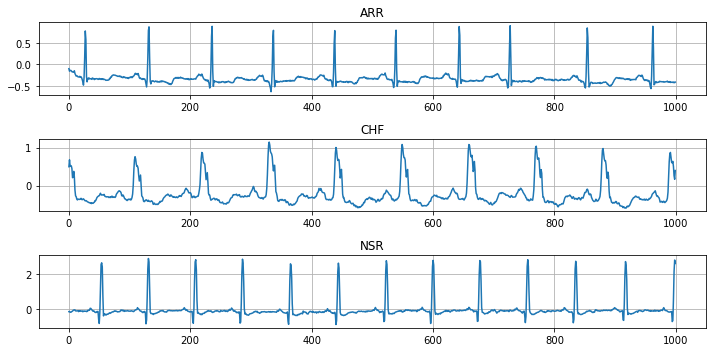

In [22]:
# Plot the three ECGs (first 1000 points)
fig, axes = plt.subplots(len(data_dict), 1, figsize=(10, 5))
for i, (key, arr) in enumerate(data_dict.items()):
    axes[i].plot(arr[0:1000])
    axes[i].set_title(key)
    axes[i].grid()

plt.tight_layout()

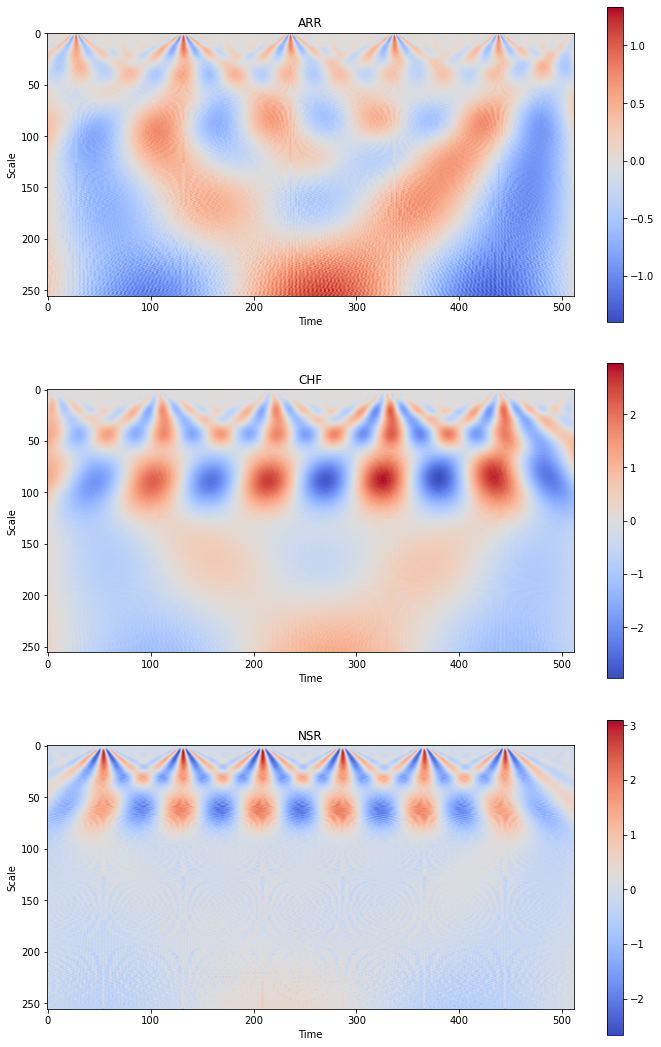

In [26]:
# Generate and Plot the three ECGs
num_steps = 256
delta_t = 1
scales = np.arange(1, num_steps+1)
wavelet_type = 'morl'
# coefs, freqs = pywt.cwt(ARR[0:500], scales, wavelet_type, delta_t)
# plt.matshow(coefs)
# plt.show()

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (key, arr) in enumerate(data_dict.items()):
    coefs, freqs = pywt.cwt(arr[0:512], scales, wavelet_type, delta_t)
    im = axes[i].imshow(coefs, cmap='coolwarm')
    plt.colorbar(im, ax=axes[i])
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Scale')
    axes[i].set_title(key)

plt.tight_layout()